In [4]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [ ]:
##### results from paper (Cuomo*, Seaton*, McCarthy* et al Nat Commun 2020)

In [ ]:
# union of ips + mesendo + defendo eQTL (pseudobulk, expanded K)

In [8]:
# load lead variant results sc stages (iPS, mesendo, defendo)
leads.ips = read.csv("/nfs/leia/research/stegle/acuomo/mean/day0/all_expts/leads.csv", row.names = 1)
leads.mes = read.csv("/nfs/leia/research/stegle/acuomo/mean/mesendo_est_June20/leads.csv", row.names = 1)
leads.defendo = read.csv("/nfs/leia/research/stegle/acuomo/mean/defendo_est_June20/leads.csv", row.names = 1)

In [9]:
leads.ips$stage = "ips"
leads.mes$stage = "mesendo"
leads.defendo$stage = "defendo"

In [10]:
### combine results

In [11]:
leads = rbind(leads.ips, leads.mes, leads.defendo)

In [12]:
leads$ensembl_gene_id = gsub("_.*","",leads$feature)

In [32]:
head(leads,2)

beta,beta_se,empirical_feature_p_value,p_value,snp_id,feature,global_corr_p_value,chrom,pos,ref_allele,...,permutation_1,permutation_2,permutation_3,permutation_4,permutation_5,permutation_6,permutation_7,permutation_8,permutation_9,stage
-1.0048674,0.08005311,3.631688e-34,3.851118e-36,5_149826526_C_T,ENSG00000164587_RPS14,2.880363e-30,5,149826526,C,...,0.5867415,0.56508683,0.6296458,0.004683908,0.5159591,0.7734028,0.6450821,0.6001209,0.9876646,ips
-0.9881017,0.08648823,2.432216e-26,3.147553e-30,11_57283988_C_T,ENSG00000134809_TIMM10,8.853960e-23,11,57283988,C,...,0.1093548,0.08194005,0.6897261,0.683497330,0.5137511,0.7877572,0.6064095,0.5419861,0.5654441,ips


In [26]:
#### pick top SNP per gene (min p-value across stages)

In [34]:
nrow(leads)
leads = leads[order(leads$p_value),]
leads = leads[-which(duplicated(leads$feature)),]
nrow(leads)

[1] 32665

[1] 10788

In [10]:
# load all results sc stages (iPS, mesendo, defendo)
res.ips = read.csv("/nfs/leia/research/stegle/acuomo/mean/day0/all_expts/allresults.csv", row.names = 1)
res.mes = read.csv("/nfs/leia/research/stegle/acuomo/mean/mesendo_est_June20/allresults.csv", row.names = 1)
res.defendo = read.csv("/nfs/leia/research/stegle/acuomo/mean/defendo_est_June20/allresults.csv", row.names = 1)

In [11]:
res.ips$stage = "ips"
res.mes$stage = "mesendo"
res.defendo$stage = "defendo"

In [35]:
res = rbind(res.ips, res.mes, res.defendo)

In [ ]:
res$ensembl_gene_id = gsub("_.*","",res$feature)

In [36]:
head(res,2)

beta,beta_se,empirical_feature_p_value,p_value,snp_id,feature,permutation_0,permutation_1,permutation_2,permutation_3,...,permutation_6,permutation_7,permutation_8,permutation_9,ensembl_gene_id,chrom,pos,ref_allele,alt_allele,stage
0.1034053,0.1156505,1,0.3712581,1_100712195_G_C,ENSG00000079335_CDC14A,0.4119083,0.02609394,0.6008147,0.1373799,...,0.1993281,0.2655322,0.9174491,0.8586736,ENSG00000079335,1,100712195,G,C,ips
0.1034053,0.1156505,1,0.3712581,1_100713300_G_T,ENSG00000079335_CDC14A,0.4119083,0.02609394,0.6008147,0.1373799,...,0.1993281,0.2655322,0.9174491,0.8586736,ENSG00000079335,1,100713300,G,T,ips


In [37]:
#### pick top eQTL per stage (min p-value across stages)

In [38]:
res$eqtl = paste0(res$feature,"-",res$snp_id)
nrow(res)

[1] 16059303

In [39]:
res = res[order(res$p_value),]
res = res[-which(duplicated(res$eqtl)),]
nrow(res)

[1] 5567940

In [ ]:
##### limix QTL reproducing CellRegMap association test

In [ ]:
# limix_qtl with two random effects (single cells, expanded K + CCt)

In [1]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/limix_qtl_pipeline_Gtest/Gtest_10MOFA/"

In [5]:
myfile = paste0(mydir,"results_mj/TestOutChr19/top_qtl_results_all.txt")
df = read.csv(myfile, sep="\t")
nrow(df)
head(df,2)

[1] 864

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,rho,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id
19_57703077_T_G,9.758964e-06,-0.06163494,0.01393437,2.335648e-07,19,57702868,57724724,27598,99,1.859690,37.35126,0.8,19,57703077,G,1,0.4141414,1.00000000,ENSG00000083844
19_53816432_C_T,5.936559e-04,-0.06402515,0.01863979,6.353399e-03,19,53662466,53696639,27598,99,1.519646,74.48449,0.9,19,53816432,T,1,0.3939394,0.09246273,ENSG00000197497


In [3]:
length(unique(df$feature_id))

[1] 825

In [4]:
myfile0 = paste0(mydir,"results_mj/qtl_results_all.txt")
df0 = read.csv(myfile0, sep="\t")
nrow(df0)
# head(df0,2)

[1] 963276

In [5]:
length(unique(df0$feature_id))

[1] 825

In [ ]:
####################
#### merge

In [45]:
genes_new = as.character(unique(df0$feature_id))
genes_old = as.character(unique(res$ensembl_gene_id))

In [46]:
length(genes_old)
head(genes_old,2)

[1] 10788

[1] "ENSG00000163682" "ENSG00000226278"

In [47]:
length(genes_new)
head(genes_new,2)

[1] 825

[1] "ENSG00000083844" "ENSG00000267809"

In [48]:
common_genes = genes_new[genes_new %in% genes_old]
length(common_genes)

[1] 822

In [49]:
########## new leads & old results

In [51]:
df$ensembl_gene_id = df$feature_id

In [52]:
df1 = inner_join(df,res, by=c("ensembl_gene_id","snp_id"), suffix = c(".new",".old"))

In [53]:
nrow(df1)

[1] 437

In [58]:
cor.test(-log10(df1$p_value.new),-log10(df1$p_value.old))


	Pearson's product-moment correlation

data:  -log10(df1$p_value.new) and -log10(df1$p_value.old)
t = 16.439, df = 435, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5576044 0.6737137
sample estimates:
      cor 
0.6190301 


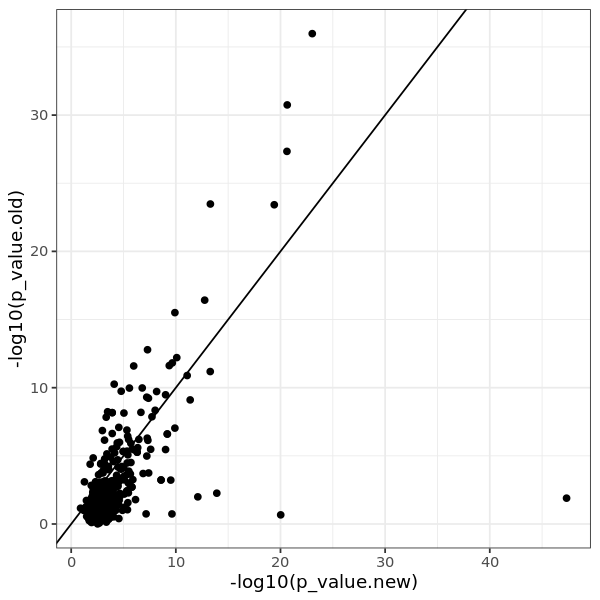

In [73]:
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(df1, aes(x=-log10(p_value.new),y=-log10(p_value.old))) + geom_point() + theme_bw() + geom_abline()

In [ ]:
########## old leads & new results

In [60]:
df0$ensembl_gene_id = df0$feature_id
df2 = inner_join(df0,leads, by=c("ensembl_gene_id","snp_id"), suffix = c(".new",".old"))

In [61]:
nrow(df2)

[1] 815

In [62]:
cor.test(-log10(df2$p_value.new),-log10(df2$p_value.old))


	Pearson's product-moment correlation

data:  -log10(df2$p_value.new) and -log10(df2$p_value.old)
t = 41.019, df = 813, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7974013 0.8422883
sample estimates:
      cor 
0.8211103 


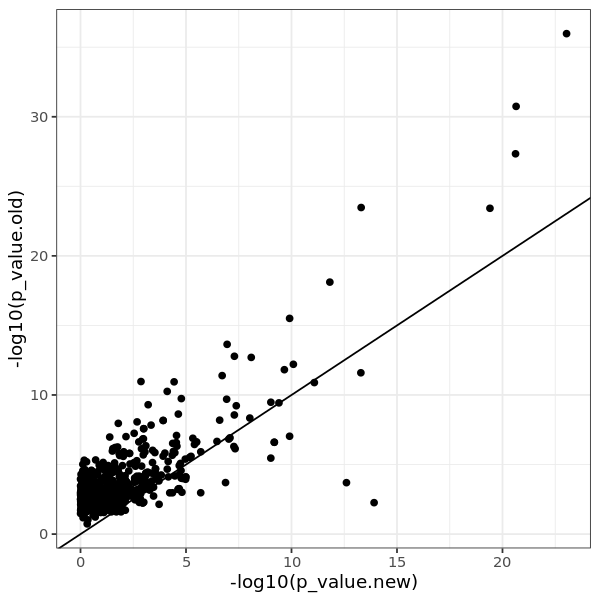

In [72]:
ggplot(df2, aes(x=-log10(p_value.new),y=-log10(p_value.old))) + geom_point() + theme_bw() + geom_abline()

In [ ]:
########## old & new results

In [64]:
df3 = inner_join(df0,res, by=c("ensembl_gene_id","snp_id"), suffix = c(".new",".old"))

In [65]:
nrow(df3)

[1] 400662

In [66]:
cor.test(-log10(df3$p_value.new),-log10(df3$p_value.old))


	Pearson's product-moment correlation

data:  -log10(df3$p_value.new) and -log10(df3$p_value.old)
t = 606.25, df = 400660, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6900771 0.6933070
sample estimates:
      cor 
0.6916955 


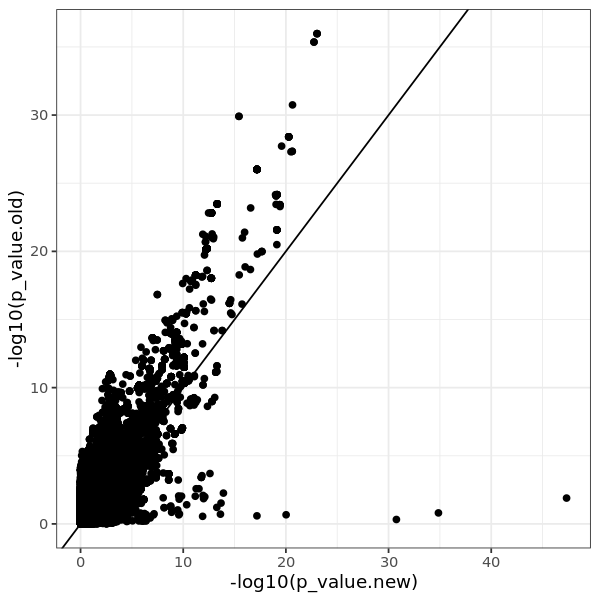

In [71]:
ggplot(df3, aes(x=-log10(p_value.new),y=-log10(p_value.old))) + geom_point() + theme_bw() + geom_abline()

In [82]:
df3[-log10(df3$p_value.new)>15 & -log10(df3$p_value.old)<5,
    c("feature_id","snp_id","p_value.new","p_value.old","beta.new","beta.old")]

,feature_id,snp_id,p_value.new,p_value.old,beta.new,beta.old
95359,ENSG00000142534,19_50014977_G_A,4.590556e-48,0.0127212,0.9765529,0.14362828
95360,ENSG00000142534,19_49966394_C_T,1.385978e-35,0.1558861,0.7112633,0.06157825
95361,ENSG00000142534,19_50055209_G_A,1.722373e-31,0.4740234,0.7021791,-0.03876508
139137,ENSG00000105426,19_5233070_T_C,9.511993e-21,0.2135479,0.6647556,0.07731829
139138,ENSG00000105426,19_5192372_C_G,6.607784e-18,0.2559733,-0.5790160,-0.10891169


In [ ]:
###### look these up in betaGxE results?

In [76]:
df_beta = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/genetic_effect/MOFA10/eqtl_tot_genetic_effect_all.txt", sep="\t",row.names = 1)
head(df_beta)

,ENSG00000005059_CCDC109B_.4_110648632_T_A,ENSG00000006016_CRLF1_.19_18735221_G_T,ENSG00000006459_KDM7A_.7_139913409_G_A,ENSG00000013297_CLDN11_.3_170402765_T_C,ENSG00000021300_PLEKHB1_.11_73339784_G_A,ENSG00000029639_TFB1M_.6_155635808_C_G,ENSG00000033178_UBA6_.4_68480525_C_T,ENSG00000035115_SH3YL1_.2_256116_G_T,ENSG00000059377_TBXAS1_.7_139547370_G_A,ENSG00000063761_ADCK1_.14_78311319_G_A,...,ENSG00000248098_BCKDHA_.19_41937095_G_A,ENSG00000248124_RRN3P1_.16_21818292_A_C,ENSG00000250317_SMIM20_.4_25918516_A_G,ENSG00000253203_GUSBP3_.5_68922087_T_G,ENSG00000254184_TYW1B_.7_72200923_G_A,ENSG00000256018_HIST1H3G_.6_26198845_G_C,ENSG00000256073_C21orf119_.21_33728588_C_A,ENSG00000259024_TVP23C.CDRT4_.17_15434991_C_T,ENSG00000259803_SLC22A31_.16_89234110_G_C,ENSG00000267323_SLC25A1P5_.19_28298186_T_C
21843_1#10,-0.02336156,0.037167263,-0.029627685,0.18296979,-0.03793941,-0.029324411,0.031398501,-0.03962300,0.08013833,0.027498382,...,-0.08185803,-0.10862369,-0.10317566,-0.048543205,0.095111678,-0.002571070,-0.055608331,0.1931245,-0.06168149,0.054686251
21843_1#100,-0.04797379,-0.002567715,-0.050303678,0.14204539,-0.06425603,-0.017894114,-0.064683766,-0.08820444,0.23273882,0.040375905,...,-0.16133495,-0.45571807,-0.09858982,-0.095641305,0.007662211,-0.001386594,-0.094118770,0.2614240,-0.16271379,-0.037051849
21843_1#101,-0.01707154,-0.038323702,0.001072175,0.05068042,-0.04211749,-0.028163711,-0.079442257,-0.05854781,0.14245545,0.019225081,...,-0.08464140,-0.22917228,-0.08647358,-0.027566411,0.030433187,-0.038522875,-0.007152012,0.1489600,-0.08467373,-0.001068028
21843_1#102,-0.06849843,0.029141143,0.006591071,0.27772236,0.05210891,-0.039448204,0.002744249,-0.08783030,0.06083871,0.034590880,...,-0.05465162,-0.09382258,-0.12475134,-0.009728905,0.052761776,-0.008942713,-0.024298554,0.2108875,-0.06577307,0.020432219
21843_1#103,-0.02065975,0.017882432,-0.019780588,0.12713250,-0.04432031,-0.010911430,-0.024407791,-0.03931027,0.06883815,0.009218694,...,-0.04543236,-0.13128624,-0.06491895,-0.033262391,0.063575007,0.044047100,-0.037472203,0.1392061,-0.06160699,0.047756355
21843_1#105,0.03203034,0.029327187,-0.015424171,0.13315777,-0.03401761,-0.004702419,-0.075634975,-0.02003224,0.09548422,0.003292832,...,-0.08535482,-0.14593277,-0.07771164,-0.053617513,0.141638220,0.019637691,0.041395040,0.1576655,-0.03509197,0.113248113


In [81]:
grep("RPS11",colnames(df_beta))
grep("PTPRS",colnames(df_beta))

integer(0)

integer(0)

In [ ]:
####################### gaussianised

In [24]:
gauss_folder = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/limix_qtl_pipeline_Gtest/Gtest_10MOFA/results_mj/TestOutChr19_Gauss/"

In [25]:
list.files(gauss_folder)

[1] "Perm"                       "permutationInformation.txt"
[3] "qtl_results_all.txt"        "top_qtl_results_all.txt"

In [26]:
perm_filename = paste0(gauss_folder,'permutationInformation.txt')
df_p = read.csv(perm_filename, sep="\t")

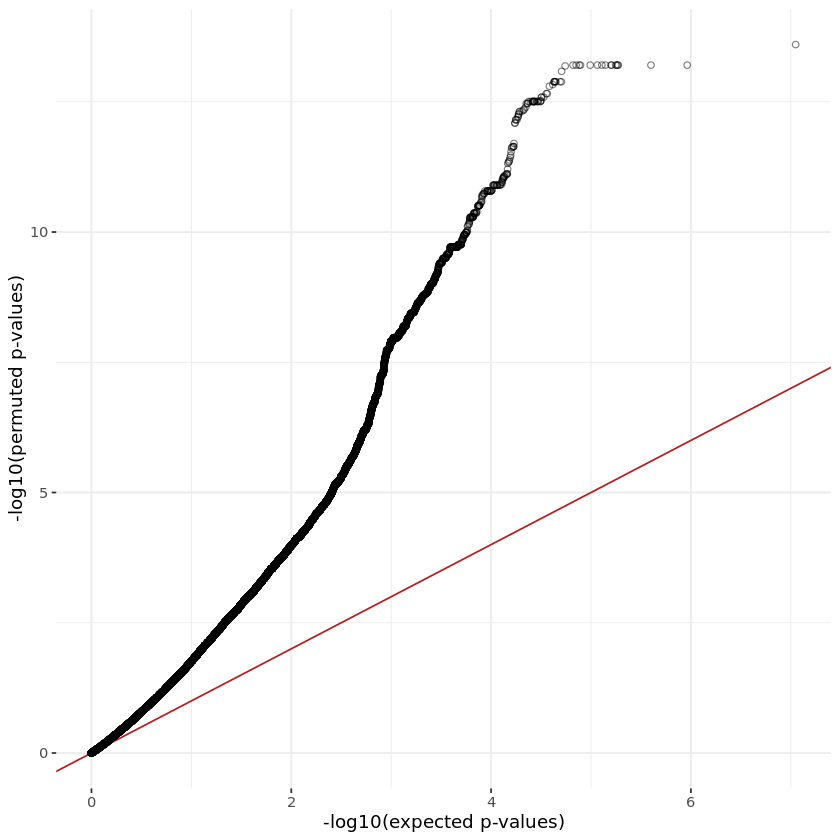

In [27]:
df_p$pv_uniform = runif(dim(df_p)[1], min = 0, max = 1)
p1 = ggplot(df_p, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(permutation_0)))) + 
        geom_abline(slope = 1, intercept = 0, col = "firebrick") +
        geom_point(alpha = 0.5, pch = 1) + xlab("-log10(expected p-values)") + ylab("-log10(permuted p-values)") +
        theme_bw() + 
        theme(legend.position="none", panel.border = element_blank())
p1

In [ ]:
####################### permutations

In [1]:
perm_filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/limix_qtl_pipeline_Gtest/Gtest_10MOFA/results_mj/TestOutChr19/Perm/permutationInformation.txt"

In [2]:
df_p = read.csv(perm_filename, sep="\t")
head(df_p)

permutation_0,permutation_1,permutation_2,permutation_3,permutation_4,permutation_5,permutation_6,permutation_7,permutation_8,permutation_9,snp_id,feature,QTL
0.3968642,0.1572322,0.6636137,0.6048414,0.2296011,0.4366199,0.8005798,0.2582176,0.4278385,0.4159007,19_226776_C_T,ENSG00000225373,19_226776_C_T-ENSG00000225373
0.5495692,0.8175322,0.5967550,0.3545064,0.4021758,0.5639303,0.9012174,0.1638183,0.1198824,0.4415691,19_240867_A_C,ENSG00000225373,19_240867_A_C-ENSG00000225373
0.8810182,0.5456809,0.7888184,0.2943725,0.2266230,0.9829922,0.7687514,0.3142120,0.2097647,0.3697653,19_244421_A_G,ENSG00000225373,19_244421_A_G-ENSG00000225373
0.8810182,0.5456809,0.7888184,0.2943725,0.2266230,0.9829922,0.7687514,0.3142120,0.2097647,0.3697653,19_244426_C_T,ENSG00000225373,19_244426_C_T-ENSG00000225373
0.9707168,0.3380196,0.9632803,0.3076609,0.5091291,0.7668432,0.5451516,0.2318570,0.1780557,0.2542763,19_245631_C_T,ENSG00000225373,19_245631_C_T-ENSG00000225373
0.9375692,0.4902079,0.8255577,0.2721282,0.2470866,0.8593799,0.6996990,0.2883479,0.1671771,0.3223684,19_245844_A_G,ENSG00000225373,19_245844_A_G-ENSG00000225373


In [13]:
length(unique(df_p$feature))

[1] 855

In [14]:
features = unique(leads$ensembl_gene_id)
length(features)

[1] 10788

In [15]:
df_p = df_p[df_p$feature %in% features,]
length(unique(df_p$feature))

[1] 852

In [17]:
df_p = df_p[-which(duplicated(df_p$feature)),]

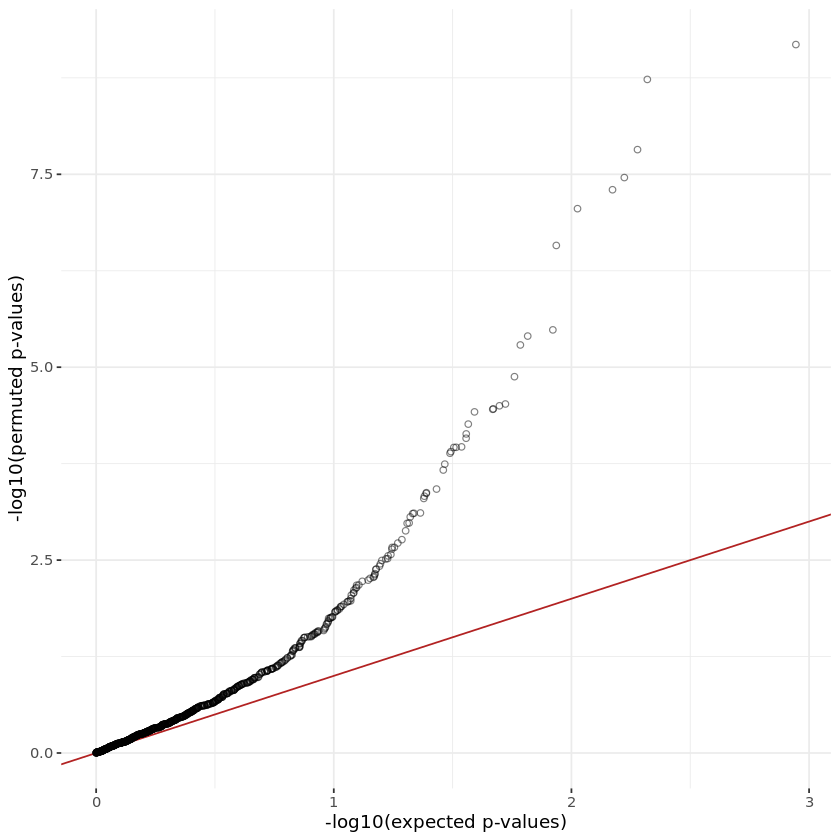

In [19]:
df_p$pv_uniform = runif(dim(df_p)[1], min = 0, max = 1)
p1 = ggplot(df_p, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(permutation_9)))) + 
        geom_abline(slope = 1, intercept = 0, col = "firebrick") +
        geom_point(alpha = 0.5, pch = 1) + xlab("-log10(expected p-values)") + ylab("-log10(permuted p-values)") +
        theme_bw() + 
        theme(legend.position="none", panel.border = element_blank())
p1

In [ ]:
df = results
df$pv_uniform = runif(dim(df)[1], min = 0, max = 1)
p1 = ggplot(df, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(permutation_3)))) + 
        geom_abline(slope = 1, intercept = 0, col = "firebrick") +
        geom_point(alpha = 0.5, pch = 1) + xlab("-log10(expected p-values)") + ylab("-log10(permuted p-values)") +
        theme_bw() + 
        theme(legend.position="none", panel.border = element_blank())
p2 = ggplot(df) + 
        geom_abline(slope = 1, intercept = 0, col = "firebrick") +
        geom_point(alpha = 0.5, pch = 1, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(permutation_3)))) +
        geom_point(color = "cornflowerblue", alpha = 0.5, pch = 1, 
                   aes(x = sort(-log10(pv_uniform)), y = sort(-log10(p_value)))) + 
        xlab("-log10(expected p-values)") + ylab("-log10(observed p-values)") + 
        theme_bw() + 
        theme(legend.position="none", panel.border = element_blank())
options(repr.plot.width = 10, repr.plot.height = 4) 
library(cowplot)
plot_grid(p1, p2, ncol = 2)